In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
print(df['Seller_Type'].unique())
print("------------------------------------")
print(df['Fuel_Type'].unique())
print("------------------------------------")
print(df['Transmission'].unique())
print("------------------------------------")
print(df['Owner'].unique())

['Dealer' 'Individual']
------------------------------------
['Petrol' 'Diesel' 'CNG']
------------------------------------
['Manual' 'Automatic']
------------------------------------
[0 1 3]


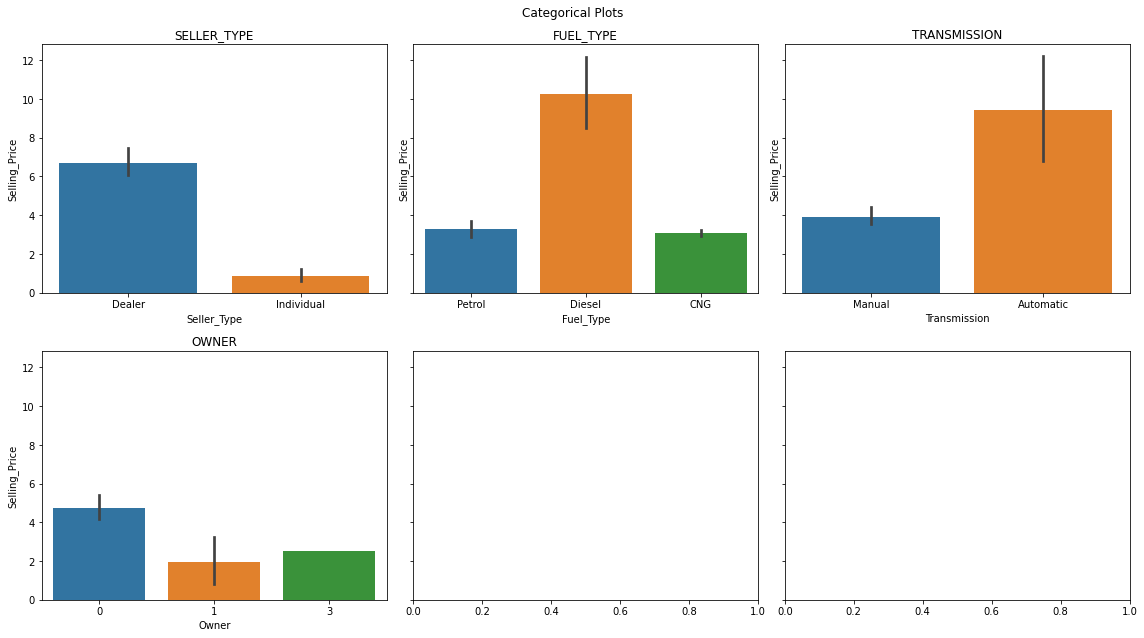

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
fig.suptitle('Categorical Plots')

# Seller_Type
sns.barplot(ax=axes[0,0], x='Seller_Type', y='Selling_Price',data=df)
axes[0,0].set_title("SELLER_TYPE")

# Fuel_Type
sns.barplot(ax=axes[0,1], x='Fuel_Type', y='Selling_Price',data=df)
axes[0,1].set_title("FUEL_TYPE")

# Transmission
sns.barplot(ax=axes[0,2], x='Transmission', y='Selling_Price',data=df)
axes[0,2].set_title('TRANSMISSION')

# Owner
sns.barplot(ax=axes[1,0], x='Owner', y='Selling_Price',data=df)
axes[1,0].set_title('OWNER')
fig.tight_layout()
plt.show()

In [6]:
# Checking missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Handling Year Column
Using year column creating a new column named No of Years

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
#Not taking Car name as there can be too many car names and for prediction
#name is not required.
new_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
new_df['Current_year']=2021
new_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [11]:
new_df["No of Years"] = new_df['Current_year']-new_df['Year']
new_df.drop(['Current_year','Year'],axis=1,inplace=True)
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Handling Categorical Data

In [12]:
new_df = pd.get_dummies(new_df,drop_first=True)
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [13]:
new_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No of Years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

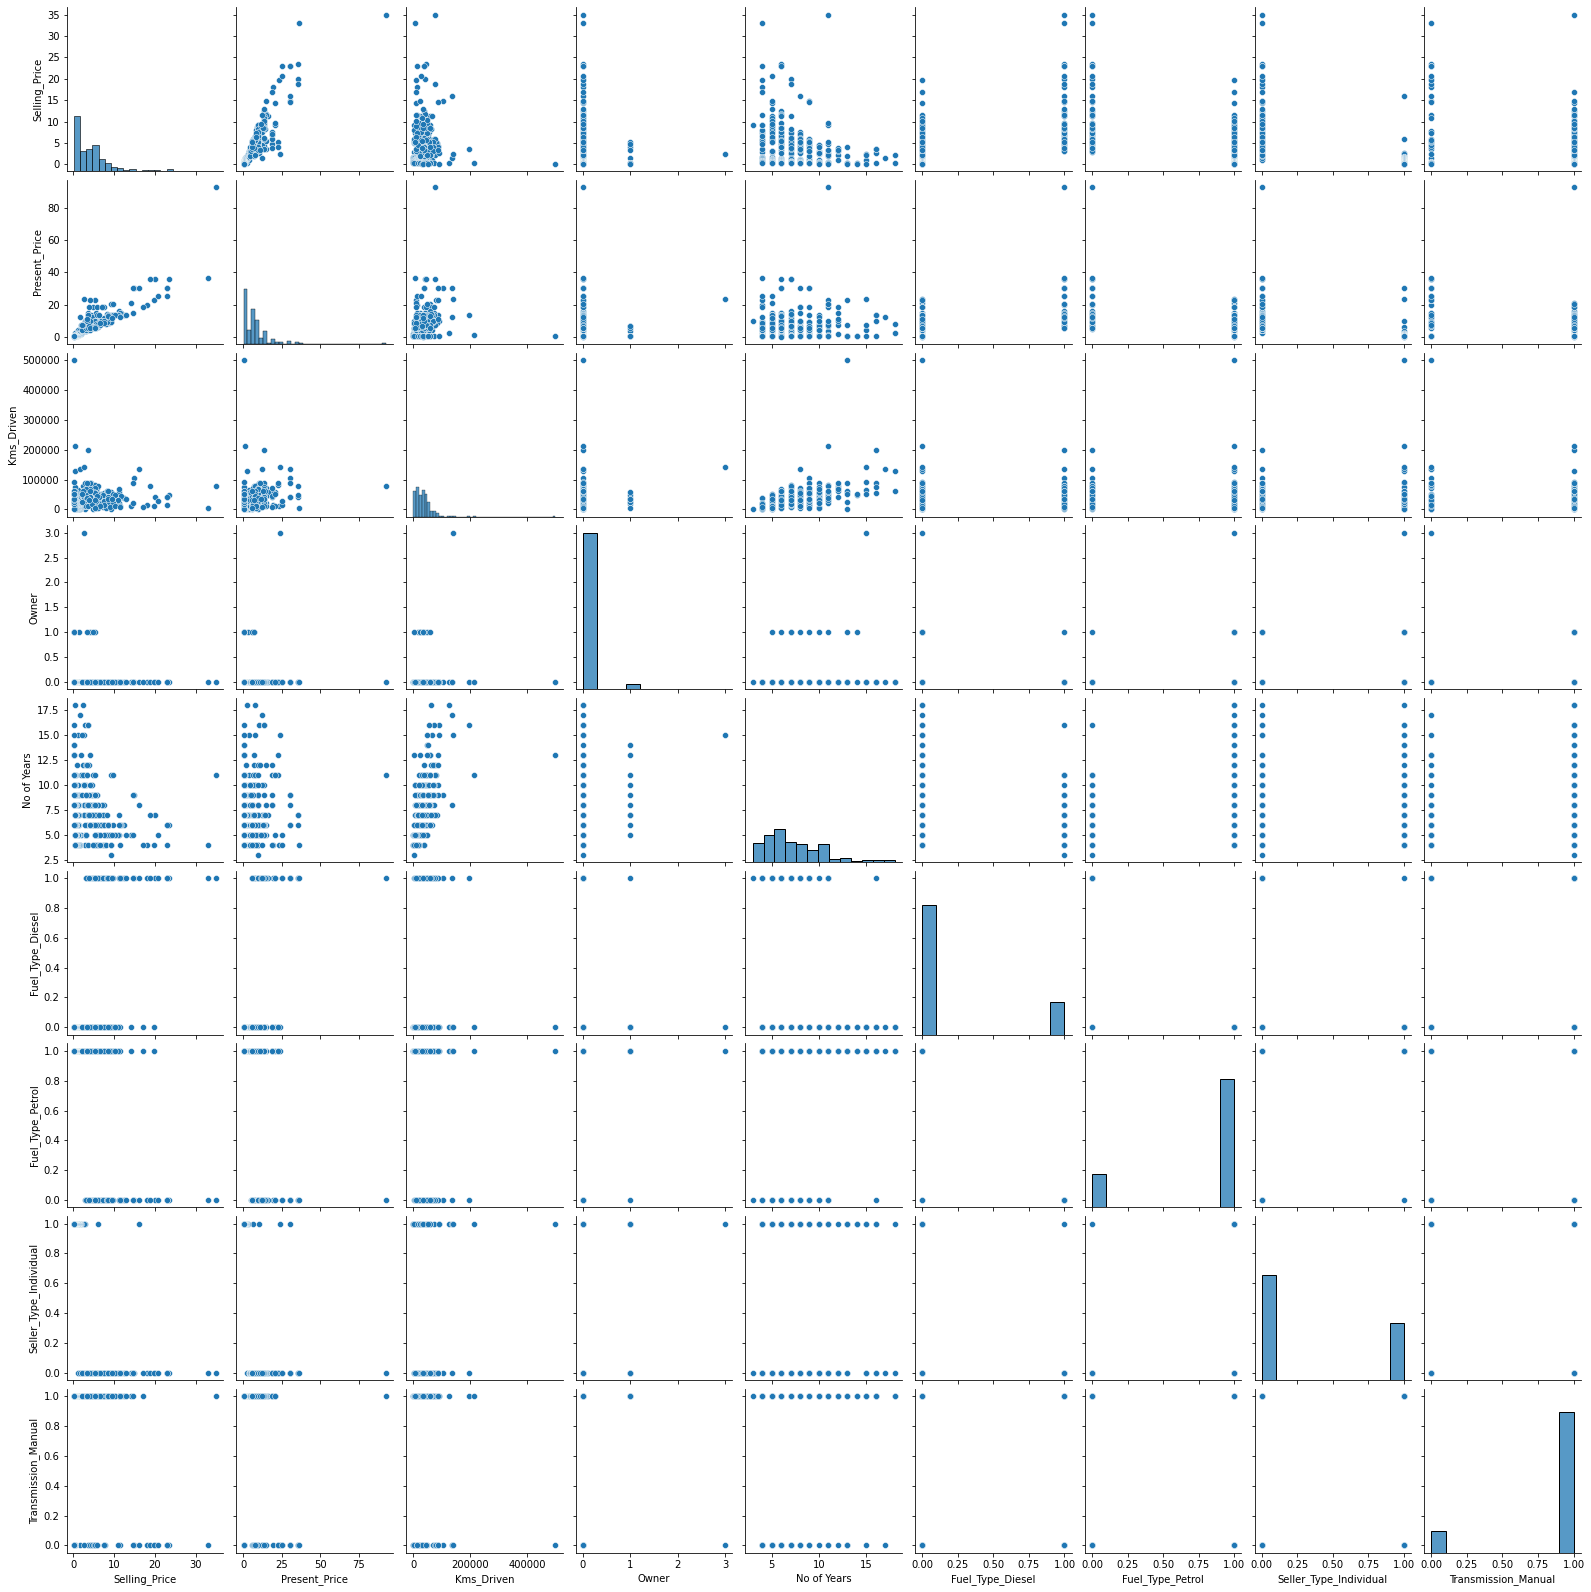

In [14]:
sns.pairplot(new_df)

### Correlation

In [15]:
new_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No of Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

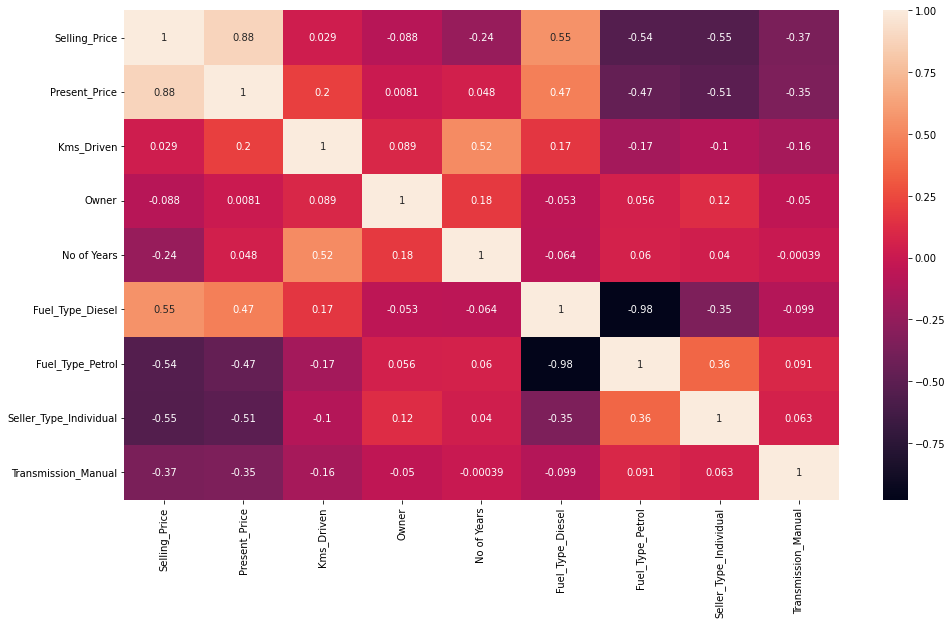

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),annot=True)

In [17]:
X = new_df.drop(['Selling_Price'],axis=1)
y = new_df['Selling_Price']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Present_Price           301 non-null    float64
 1   Kms_Driven              301 non-null    int64  
 2   Owner                   301 non-null    int64  
 3   No of Years             301 non-null    int64  
 4   Fuel_Type_Diesel        301 non-null    uint8  
 5   Fuel_Type_Petrol        301 non-null    uint8  
 6   Seller_Type_Individual  301 non-null    uint8  
 7   Transmission_Manual     301 non-null    uint8  
dtypes: float64(1), int64(3), uint8(4)
memory usage: 10.7 KB


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
print("---------------------------------------")
print("Shape of X_train: ",X_train.shape)
print("---------------------------------------")
print("Shape of X_test: ",X_test.shape)
print("---------------------------------------")
print("Shape of y_train: ",y_train.shape)
print("---------------------------------------")
print("Shape of y_test: ",y_test.shape)
print("---------------------------------------")

---------------------------------------
Shape of X_train:  (240, 8)
---------------------------------------
Shape of X_test:  (61, 8)
---------------------------------------
Shape of y_train:  (240,)
---------------------------------------
Shape of y_test:  (61,)
---------------------------------------


In [21]:
from catboost import CatBoostRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

cat = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cat.fit(X_train, y_train, use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 4.9829692	total: 49.3ms	remaining: 24.6s
50:	learn: 1.7324391	total: 133ms	remaining: 1.17s
100:	learn: 0.9319582	total: 214ms	remaining: 846ms
150:	learn: 0.6207887	total: 331ms	remaining: 766ms
200:	learn: 0.4482512	total: 460ms	remaining: 684ms
250:	learn: 0.3346512	total: 658ms	remaining: 653ms
300:	learn: 0.2696776	total: 824ms	remaining: 545ms
350:	learn: 0.2266936	total: 1.01s	remaining: 427ms
400:	learn: 0.1868427	total: 1.19s	remaining: 295ms
450:	learn: 0.1547889	total: 1.37s	remaining: 149ms
499:	learn: 0.1327711	total: 1.55s	remaining: 0us


In [22]:
pred_cat=cat.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred_cat))
print('MSE:', metrics.mean_squared_error(y_test, pred_cat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_cat)))

MAE: 0.5754570607413234
MSE: 0.8990346028970927
RMSE: 0.9481743525834754


# Hyperparameter tuning


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [24]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

new_cat = CatBoostRegressor(verbose=0)

In [25]:
cat_random = RandomizedSearchCV(estimator = new_cat, param_distributions = grid,
                               scoring='neg_mean_squared_error', n_iter = 10, 
                               cv = 5, verbose=2, random_state=42, n_jobs = 1)

cat_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END depth=8, iterations=150, l2_leaf_reg=0.2, learning_rate=0.03; total time=   0.2s
[CV] END depth=8, iterations=150, l2_leaf_reg=0.2, learning_rate=0.03; total time=   0.2s
[CV] END depth=8, iterations=150, l2_leaf_reg=0.2, learning_rate=0.03; total time=   0.2s
[CV] END depth=8, iterations=150, l2_leaf_reg=0.2, learning_rate=0.03; total time=   0.2s
[CV] END depth=8, iterations=150, l2_leaf_reg=0.2, learning_rate=0.03; total time=   0.1s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.1s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.1s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.1s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.1s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.1s
[CV] END depth=8, iterations=100, l2_leaf_reg=0.2, lea

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fe35c8c27d0>,
                   n_jobs=1,
                   param_distributions={'depth': [2, 4, 6, 8],
                                        'iterations': [100, 150, 200],
                                        'l2_leaf_reg': [0.2, 0.5, 1, 3],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [26]:
pred_cat_new = cat_random.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred_cat_new))
print('MSE:', metrics.mean_squared_error(y_test, pred_cat_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_cat_new)))

MAE: 0.5830016721191718
MSE: 0.8351844779670975
RMSE: 0.9138842804026653
